# Gradient descent


In [2]:
## import the necessary packages
import numpy as np
import matplotlib.pyplot as plt

## define functions


In [3]:
## plots just the datapoints, in a scatter plot
def plot_datapoints(x,y):
    """
    x and y are arrays of numbers
    makes a scatter plot of the x,y datapoints
    """
    
    # draw a scatter plot of 
    plt.scatter(x, y, marker='o', c='r')
    plt.title("some data")
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    #plt.show()


In [4]:
## plots the datapoints in a scatter plot, together with a linear model for provided parameters w, b
def plot_linear_model(x,y,w,b):
    """
    x and y are equal-length arrays of data points
    w and b are the parameters of the linear model y_hat = wx + b
    plots the linear model together with a scatter plot of the datapoints
    """    

    ## get the number of data points in x,y train
    m = x.shape[0]

    ## create a zero-filled array of length m for our y-hat predictions
    y_hats = np.zeros(m)

    ## now for each x value compute the predicted y-hat value
    for i in range(m):
        y_hats[i] = w*x[i] + b

    ## now we can plot the model prediction, which will
    ## be x_train versus y_hats

    plt.plot(x, y_hats, c='b', label='prediction')

    ## and plot the data points for comparison
    plt.scatter(x, y, marker='o', c='r', label='actual data' )
    plt.title("prediction vs data")
    plt.xlabel("x axis")
    plt.ylabel("y axis")

    plt.legend(loc="upper left")
    plt.show()    # doesn't seem to be necessary

In [5]:
## computes the cost for a given linear model w, b
def compute_cost(x,y,w,b):
    """
    x and y are equal-length arrays of numbers, defining data points
    w and b are the parameters of the linear model
    """
    m = x.shape[0]

    sum=0.   #here we will accumulate the summed costs

    for i in range(m):
        y_hat = w*x[i]+b   # predicted y
        y_real = y[i]           # actual y

        err2 = (y_hat - y_real)**2  # squared error
        sum += err2            # add to accumulated sum

    return sum/(2*m)


## set a plotting style

In [6]:
# this shows the available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [20]:
# pick one of the above styles 
plt.style.use('classic')

## the data points

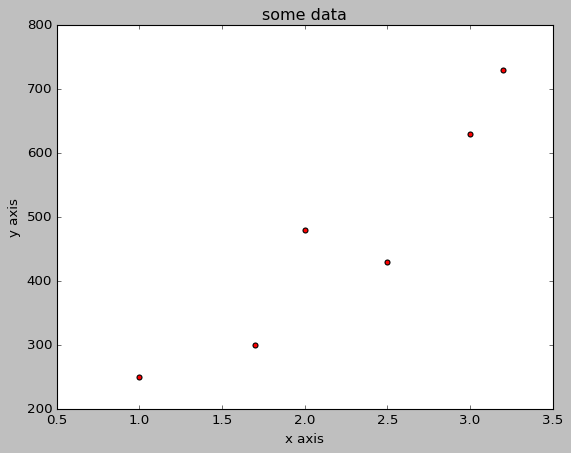

In [21]:
## set up the data points (these are values from week 1 lecture)
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

## visualize them in a scatter plot
plot_datapoints(x_train, y_train)

## data with w,b linear model

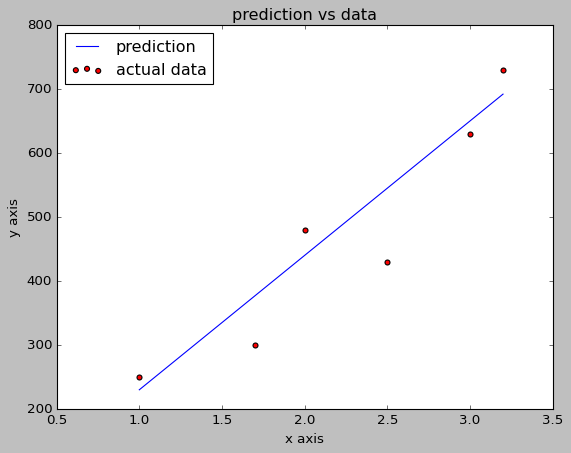

cost = 1916


In [31]:
## pick some values for the model parameters
w_fixed = 210
b_fixed = 20

plot_linear_model(x_train,y_train, w_fixed, b_fixed)

## and let's compute the cost of this w,b model
c = compute_cost(x_train, y_train, w_fixed, b_fixed)    # compute its cost
print(f"cost = {round(c)}")

## Visualize cost function

Set the range of w values and b values that we want to use for this section

In [10]:
# set b_train and w_train, the range of values that we want to use
w_train = np.array([i for i in range(50, 350, 25)])
b_train = np.array([i for i in range(-40, 200, 20)])


### Plots of w versus cost, for fixed values of b

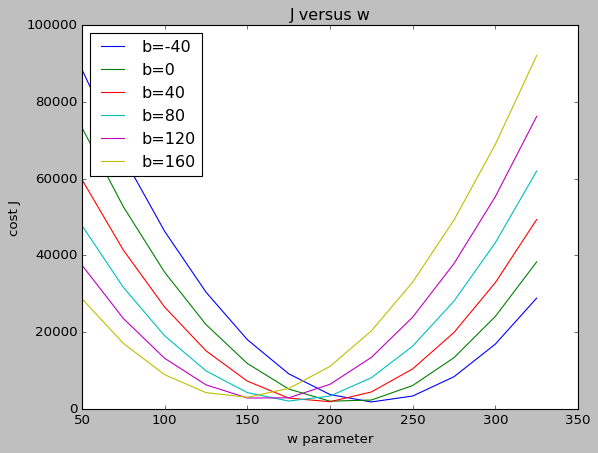

In [23]:
## function to plot cost J vs w  for a provided value of b
def cost_versus_w(x,y,bval):
    """plots cost J versus w for a provided value of b
    """
    m = w_train.shape[0]
    J_train = np.zeros(m)

    for i in range(m):
        # use provided value of b, vary only the w value
        J_train[i] = compute_cost(x,y,w_train[i], bval)

    plt.plot(w_train, J_train, label=f"b={bval}")
    

## call cost versus w for different values of b
for bval in [-40, 0, 40, 80, 120, 160]:  # don't use btrain as it has too many values
    cost_versus_w(x_train, y_train, bval)  
plt.title("J versus w")
plt.xlabel("w parameter")
plt.ylabel("cost J")
plt.legend(loc="upper left")

### 3D scatter plot of w,b versus cost

Text(0.5, 0.5, 'b parameter')

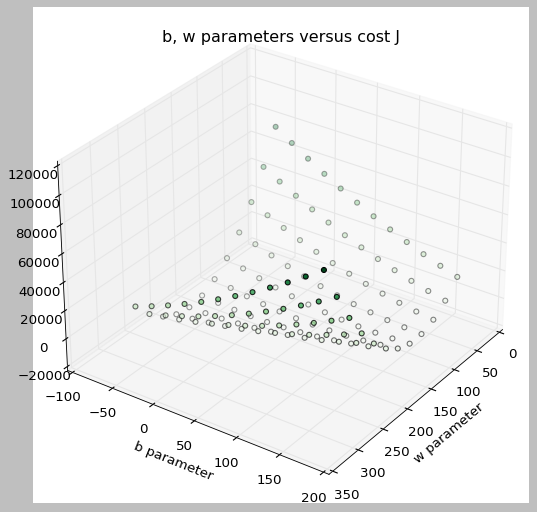

In [24]:
## we use the w_train and b_train defined at the top of this section, 
## and the x_train, y_train datapoints defined at the top of the notebook

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

m = len(w_train)*len(b_train)   # number of J-points to plot

# empty array for three axes
W = np.zeros(m)
B = np.zeros(m)
J = np.zeros(m)   

# compute values for axis arrays
i=0
for w in w_train:
    for b in b_train:
        W[i] = w
        B[i] = b
        J[i] = compute_cost(x_train, y_train, w, b)  
        i += 1

ax.scatter3D(W, B, J, c=J, cmap='Greens')
ax.view_init(30, 35)

plt.title("b, w parameters versus cost J")
plt.xlabel("w parameter")
plt.ylabel("b parameter")

### 3d surface plot of w,b versus cost

Text(0.5, 0.5, 'b parameter')

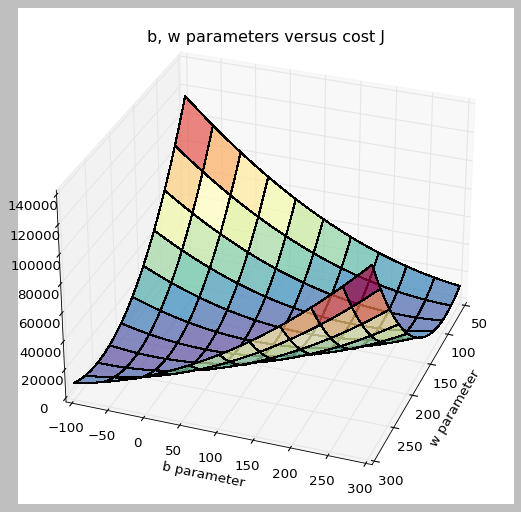

In [41]:
## as before, set up the figure
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


#Useful linearspaces to give values to the parameters w and b
wspace = np.linspace(50, 300, 100)   # start, stop, num (where num is the number of evenly spaced values we want)
bspace = np.linspace(-100, 300, 100)

## but now we need to create a MESHGRID for the inputs
W,B = np.meshgrid(wspace, bspace)

## compute all the values in one shot
J = compute_cost(x_train, y_train, W, B)

## draw the plot

#ax.contour3D(W, B, J, 50, cmap='Greens')
ax.plot_surface(W, B, J, cmap = "Spectral_r", alpha=0.7, antialiased=False)
#ax.plot_wireframe(W, B, J, color="black")

ax.view_init(30, 20)

plt.title("b, w parameters versus cost J")
plt.xlabel("w parameter")
plt.ylabel("b parameter")